<a href="https://colab.research.google.com/github/molnaredom/melytanulas/blob/main/m%C3%A9lytanul%C3%A1s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dokumentáció**

https://docs.google.com/document/d/14W1howYV8TCEDbZITHbYIpD_vMSsvbOTG4_msmGppHw/edit




# Adatok beolvasása

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
# Default settings
def set_df_disp(maxrow=False, max_col=False, maxwidth=False, maxcolwidth=False):
    """
    :param maxrow:
    :param max_col:
    :param maxwidth:
    :param maxcolwidth:
    :return:
    """
    if maxrow:
        pd.set_option('display.max_rows', None)
    if max_col:
        pd.set_option('display.max_columns', None)
    if maxwidth:
        pd.set_option('display.width', None)
    if maxcolwidth:
        pd.set_option('display.max_colwidth', -1)

set_df_disp(maxwidth= True, maxcolwidth=True, max_col=True, maxrow=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [3]:
# data reading


data = pd.read_csv("https://raw.githubusercontent.com/molnaredom/melytanulas/main/train_data.csv", sep=',', error_bad_lines=False)

#normalize data
scaler = MinMaxScaler()
data=pd.DataFrame(scaler.fit_transform(data),columns=data.columns, index=data.index) 

# shuffle train data, with seed
data_shuffled = data.sample(frac=1, random_state=1)

# label
print(data_shuffled.head())

     Subject id  Jitter (local)  Jitter (local absolute)  Jitter (rap)  \
705  0.692308    0.049062        0.046388                 0.029042       
447  0.435897    0.681728        0.274632                 0.572165       
748  0.717949    0.117581        0.194259                 0.093664       
592  0.564103    0.201043        0.249267                 0.213226       
80   0.076923    0.027844        0.020793                 0.036963       

     Jitter (ppq5)  Jitter (ddp)  Shimmer (local)  Shimmer (local dB)  \
705  0.024441       0.029125      0.189127         0.323147             
447  0.412971       0.572225      0.576942         0.676853             
748  0.065745       0.093743      0.342086         0.475936             
592  0.128297       0.213217      0.324564         0.474026             
80   0.019909       0.036961      0.170029         0.263560             

     Shimmer (apq3)  Shimmer (apq5)   Shimmer (apq11)  Shimmer (dda)  \
705  0.114358        0.073997        0.17542

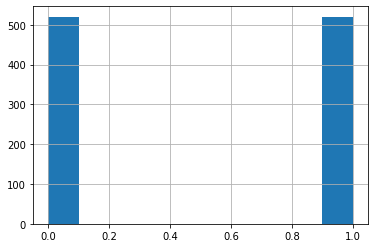

In [4]:
data_shuffled["class information"].hist( )

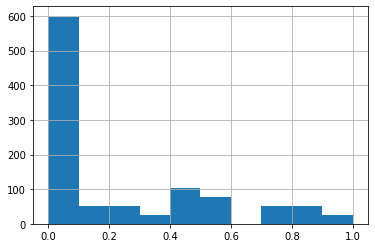

In [5]:
data_shuffled["UPDRS"].hist( )

In [6]:
# separate train data for train and validation dataframe
train = data_shuffled.iloc[:800,:]
validation = data_shuffled.iloc[800:,:]

# separate dataframes for label and features df
train_class_label = train["class information"].apply(lambda x: int(x))
train_UPDRS_label = train["UPDRS"]
train_features = train.iloc[:,1:-2]

validation_class_label = validation["class information"].apply(lambda x: int(x))
validation_UPDRS_label =validation["UPDRS"]
validation_features = validation.iloc[:,1:-2]


print("Shapes",
      "\ntrain_class_label" , train_class_label.shape,
      "\ntrain_UPDRS_label", train_UPDRS_label.shape,
      "\ntrain_features:", train_features.shape,

      "\n\nvalidation_class_label:",validation_class_label.shape,
      "\nvalidation_UPDRS_label:",validation_UPDRS_label.shape,
      "\nvalidation_features:", validation_features.shape, 
      )

Shapes 
train_class_label (800,) 
train_UPDRS_label (800,) 
train_features: (800, 26) 

validation_class_label: (240,) 
validation_UPDRS_label: (240,) 
validation_features: (240, 26)


In [23]:
# Read test data

test_data = pd.read_csv("https://raw.githubusercontent.com/molnaredom/melytanulas/main/test_data.csv",
                                       sep=',', error_bad_lines=False)

#shuffle
test_data = test_data.sample(frac=1, random_state=1)


scaler = MinMaxScaler()
test_features = test_data.iloc[:,1:-1]# 1-st col Subject id thrown, -1col labels ignored
test_classlabels = test_data.iloc[:,-1:]

#normalize only features data
test_features=pd.DataFrame(scaler.fit_transform(test_features),columns=test_features.columns, index=test_features.index)

print(test_classlabels.head())
print(test_features.head())


     class information
40   1                
132  1                
4    1                
148  1                
116  1                
     Jitter (local)  Jitter (local absolute)  Jitter (rap)  Jitter (ppq5)  \
40   0.096308        0.054301                 0.118491      0.109725        
132  0.173081        0.218115                 0.213585      0.126679        
4    0.006056        0.005248                 0.012075      0.011196        
148  0.079703        0.054985                 0.099245      0.079974        
116  0.079703        0.069815                 0.089434      0.066859        

     Jitter (ddp)  Shimmer (local)  Shimmer (local dB)  Shimmer (apq3)  \
40   0.118601      0.244791         0.252671            0.264063         
132  0.213558      0.361044         0.395833            0.378862         
4    0.012200      0.010353         0.010150            0.012042         
148  0.099484      0.353762         0.379808            0.356203         
116  0.089423      0.198421  

# Baseline


In [ ]:
# decision tree
from sklearn import tree
import pydot
import graphviz
dt = tree.DecisionTreeClassifier()
dt.fit(train_features, train_class_label)


!apt-get -qq install -y graphviz && pip install -q pydot
!pip install graphviz
graphviz.Source(tree.export_graphviz(dt, out_file=None))

In [ ]:
# prediction
from sklearn.metrics import classification_report
prediction = dt.predict(validation_features)
print(classification_report(validation_class_label, prediction))


# Deep Learning

In [ ]:
from tensorflow import keras
from tensorflow.keras import backend as K
# dropout egyelőre nem kell, nem csinál semmit, de kell, mert túltanul te f
# TODO multi-task tanítás (udprs & [0-1])
# TODO class
# def func(x):
#     greater = K.greater_equal(x, 0.5) #will return boolean values
#     greater = K.cast(greater, dtype=K.floatx()) #will convert bool to 0 and 1    
#     return greater 
model = keras.Sequential(
    [
        keras.layers.Dense(300, activation="relu", input_shape=(train_features.shape[-1],)),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
# model.add(keras.layers.Lambda(func))
model.summary()

In [ ]:
metrics = [
    keras.metrics.Accuracy(name="acc"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]

model.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics
)


history = model.fit(
    train_features.to_numpy(),
    train_class_label.to_numpy(),
    batch_size=128,
    epochs=1000,
    verbose=2,
    validation_data=(validation_features.to_numpy(), validation_class_label.to_numpy()),
)
score = model.evaluate(test_features, test_class_label, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


# model.save_weights("/path/to/model.h5")
output = keras.layers.Lambda(lambda x: K.round(x)) (model.output)
m1 = keras.Model(model.input, output)
# m1.load_weights("/path/to/model.h5")

In [ ]:
# Loss és Acc görbék rajzolása matplotlib-bel, erős ctrlv
import matplotlib.pyplot as plt
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
print(hist.tail())

def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('loss and val_loss')
    plt.plot(hist['epoch'], hist['loss'], label='loss')
    plt.plot(hist['epoch'], hist['val_loss'], label = 'val_loss')
    plt.legend()
    plt.ylim([(min(hist['loss'].min(), hist['val_loss'].min()))*0.9,
              (max(hist['loss'].max(), hist['val_loss'].max()))*1.1])

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],
           label='Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'],
           label = 'Validation Accuracy')
    plt.legend()
    plt.ylim([(min(hist['acc'].min(), hist['val_acc'].min()))*0.9,
              (max(hist['acc'].max(), hist['val_acc'].max()))*1.1])


plot_history(history)

res = model.predict(test_features)
for a,b in zip(res, test_class_label):
  print(a,b)